# Strategy One: Bollinger Bands

Bollinger Bands are great to observe the volatility of a given investment over a period of time. It is based on the simple moving average (SMA) of the investment adding the standard deviation of the SMA.

Basic trading strategy using the Bollinger Bands indicator which will shoot a buy signal if the stock price of the previous day is greater than the previous day's lower band and the current stock price is lesser than the current day’s lower band. 

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import math
from termcolor import colored as cl 
import numpy as np

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
!pip install yfinance

In [ ]:
from yfinance import Ticker
def get_ohlc(ticker, period='60d', interval='5m'):
  cols = ['Open','High','Low','Close']
  ohlc = Ticker(ticker).history(period=period, interval=interval)[cols][:-1]
  return ohlc

In [ ]:
df1 = get_ohlc('ETH-USD')

In [ ]:
def SMovingAve(data, window):
    sma = data.rolling(window = window).mean()
    return sma

In [ ]:
df1['SMA_20'] = SMovingAve(df1['Close'], 3*12*24)

In [ ]:
def BollingerBand(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

In [ ]:
df1['HigherBB'], df1['LowerBB'] = BollingerBand(df1['Close'], df1['SMA_20'], 3*12*24)

In [ ]:
df1.tail(10)

,Open,High,Low,Close,SMA_20,HigherBB,LowerBB
Datetime,,,,,,,
2022-04-03 17:20:00+00:00,3491.813232,3491.813232,3489.792969,3489.997314,3416.592292,3594.868489,3238.316095
2022-04-03 17:25:00+00:00,3488.405762,3488.405762,3487.097900,3487.097900,3416.829461,3594.934722,3238.724201
2022-04-03 17:30:00+00:00,3486.160645,3486.160645,3484.440674,3486.042969,3417.053101,3595.019971,3239.086231
2022-04-03 17:35:00+00:00,3485.872070,3487.883545,3485.872070,3487.574219,3417.278709,3595.108181,3239.449236
2022-04-03 17:40:00+00:00,3487.341064,3489.909180,3487.341064,3489.842041,3417.503826,3595.207531,3239.800121
2022-04-03 17:45:00+00:00,3490.189453,3490.606934,3489.426514,3489.426514,3417.731546,3595.298867,3240.164225
2022-04-03 17:50:00+00:00,3489.350586,3489.350586,3488.393066,3488.942627,3417.951476,3595.400168,3240.502784
2022-04-03 17:55:00+00:00,3489.739990,3491.666748,3489.739990,3491.286621,3418.175955,3595.504279,3240.847631
2022-04-03 18:00:00+00:00,3491.157959,3493.252686,3491.157959,3493.252686,3418.411527,3595.597175,3241.225879


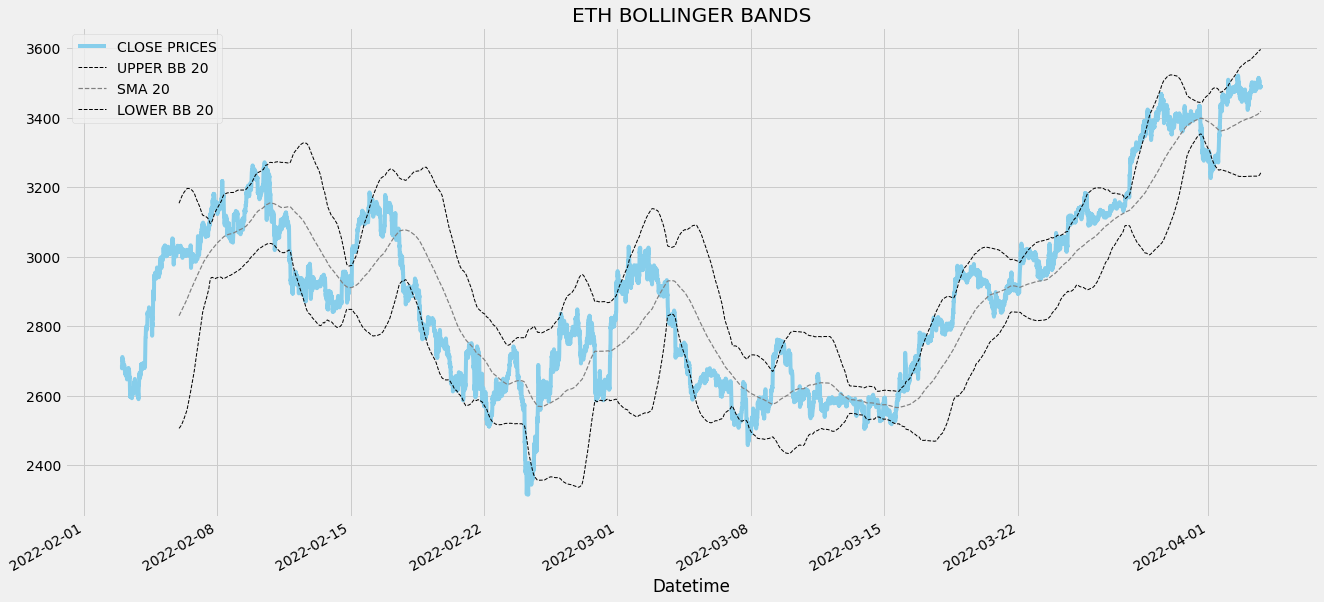

In [ ]:
df1['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
df1['HigherBB'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
df1['SMA_20'].plot(label = 'SMA 20', linestyle = '--', linewidth = 1.2, color = 'grey')
df1['LowerBB'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('ETH BOLLINGER BANDS')
plt.show()

In [ ]:
def BollingBandStrategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

In [ ]:
buy_price, sell_price, bb_signal = BollingBandStrategy(df1['Close'], df1['LowerBB'], df1['HigherBB'])

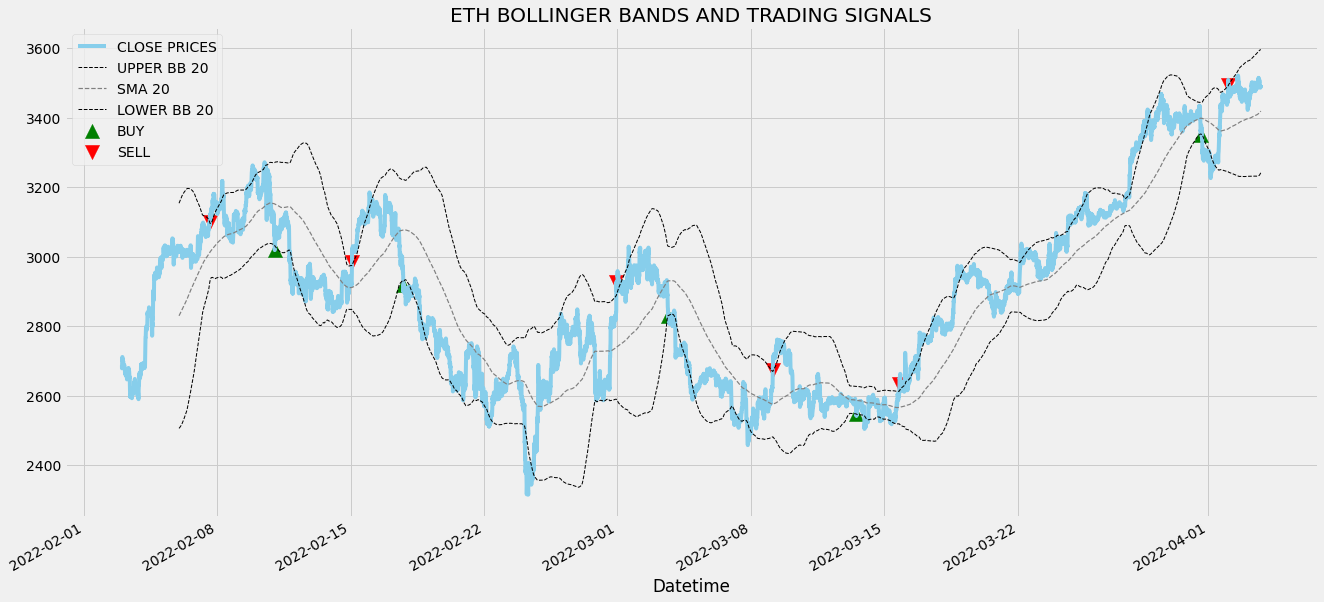

In [ ]:
df1['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
df1['HigherBB'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
df1['SMA_20'].plot(label = 'SMA 20', linestyle = '--', linewidth = 1.2, color = 'grey')
df1['LowerBB'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df1.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df1.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.legend(loc = 'upper left')
plt.title('ETH BOLLINGER BANDS AND TRADING SIGNALS')
plt.show()

In [ ]:
df1['pct_change1'] = df1['Close'].pct_change()

In [ ]:
position = []
for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df1['Close'])):
    if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]

In [ ]:
ret = pd.DataFrame(np.diff(df1['close'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

for i in range(len(tsla_ret)):
    try:
        returns = tsla_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass
    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/df1['close'][-1])
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the BB strategy by investing $100k in TSLA : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the BB strategy : {}%'.format(profit_percentage), attrs = ['bold']))

# Correlation / Portfolio Analysis

We next consider a portfolio of investments, one of the fundamental principles is in diversification of assets and here we examine correlation and practical ways of comparing the returns/risk profile of different investments. Price characteristics - daily returns and histogram of daily returns; scatter chart of returns and correlation analysis. And can easily extend to multiple number of investments being analysed.

In [3]:
import yfinance as yf

In [4]:
import matplotlib.pyplot as plt

In [5]:
tickers = ['msft', 'aapl', 'goog', 'tsla']
df2 = yf.download(tickers, start="2021-03-31", end="2022-03-31")

[*********************100%***********************]  4 of 4 completed


In [6]:
df2_close = df2['Adj Close']

Text(0.5, 0.98, 'Portfolio Summary')

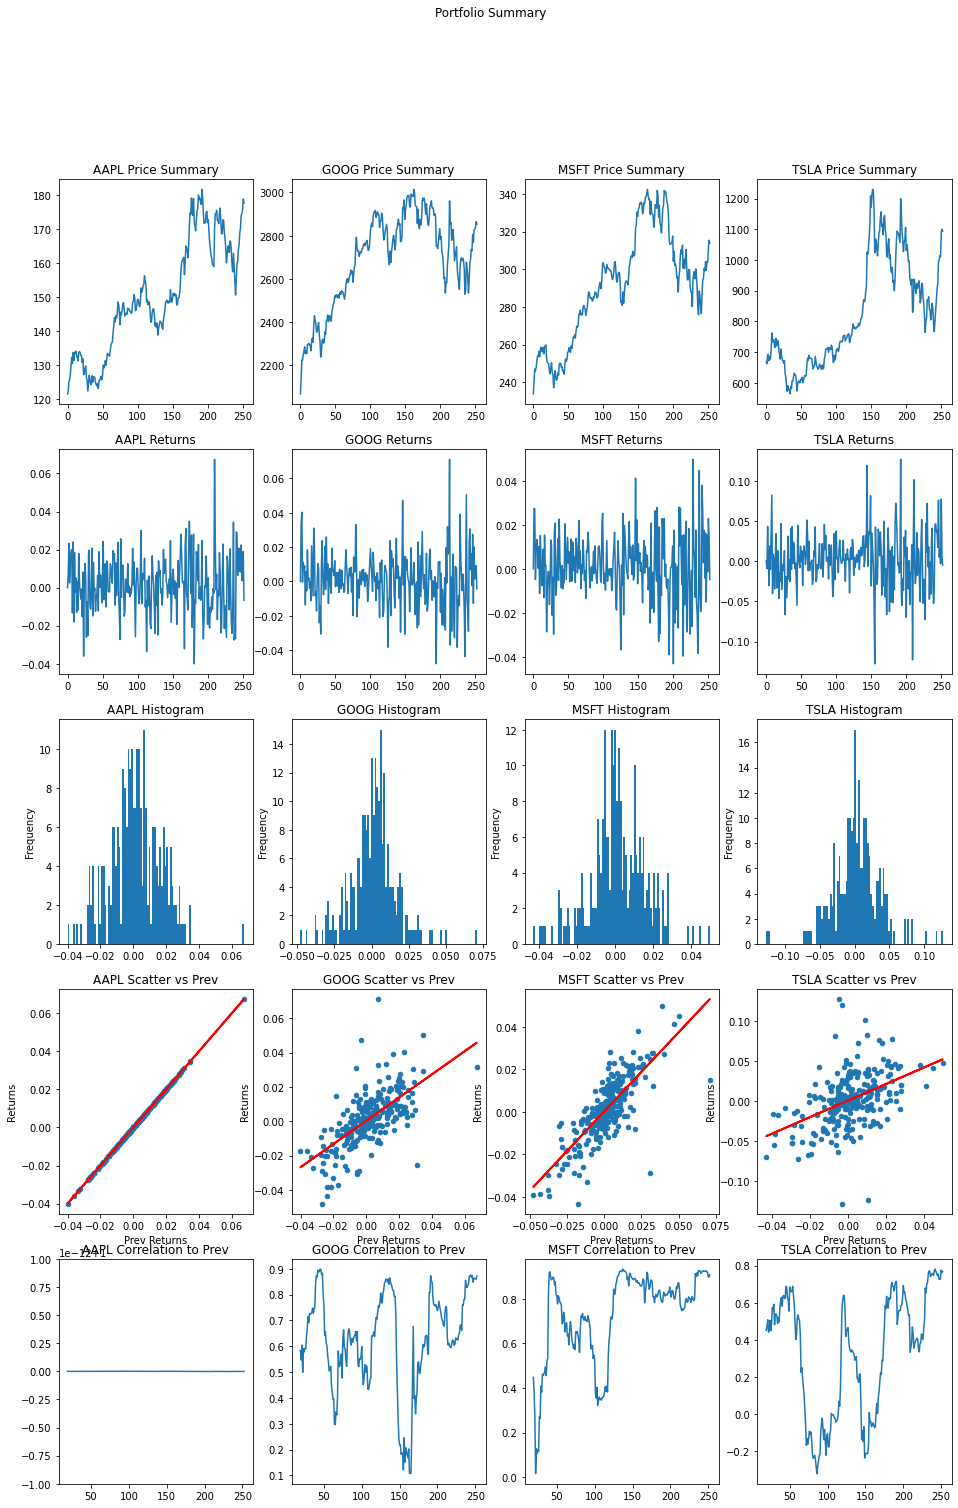

In [ ]:
fig, axs = plt.subplots(5, 4)
fig.set_size_inches(16,24)
old_df = pd.DataFrame()
x = 0

for col in df2_close.columns:

    selected_series = df2_close[col].values.tolist()
    analysis = pd.DataFrame(selected_series.copy())
    analysis.columns = ["Price"]
    analysis['Returns'] = np.log(analysis["Price"] / analysis["Price"].shift(1))
    analysis = analysis.fillna(0)
    analysis["Price"].plot(title="{} Price Summary".format(col), ax=axs[0,x])
    analysis['Returns'].plot(title="{} Returns".format(col), ax=axs[1,x])
    analysis['Returns'].plot(kind='hist', bins=100, orientation='vertical', title="{} Histogram".format(col), ax=axs[2,x])
    
    if x == 0:
        analysis['Prev Returns'] = analysis['Returns']
    else: analysis['Prev Returns'] = old_df

    regression = np.polyfit(analysis['Prev Returns'], analysis['Returns'], deg=1)
    analysis[['Prev Returns', 'Returns']].plot(kind='scatter', title="{} Scatter vs Prev".format(col), x="Prev Returns", y="Returns", ax=axs[3,x])
    axs[3,x].plot(analysis['Prev Returns'], np.polyval(regression, analysis['Prev Returns']), 'r', lw=2)

    analysis['Prev Returns'].rolling(window=20).corr(analysis['Returns']).plot(title="{} Correlation to Prev".format(col), ax=axs[4,x])
    axs[4,x].axhline(analysis['Returns'].corr().iloc[0,1], c='r')

    x += 1
    old_df = analysis['Returns']

# handles, labels = axs[0,0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='center right')

fig.suptitle("Portfolio Summary")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfb329f0d0>,
      dtype=object)

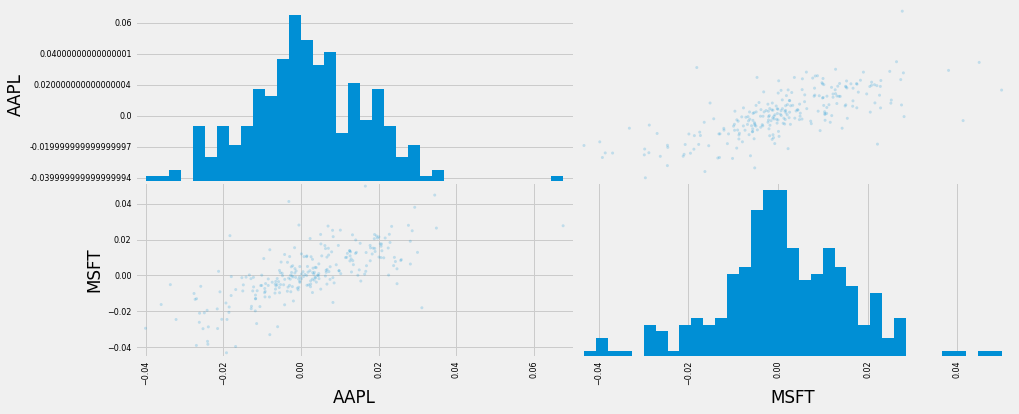

In [ ]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

In [ ]:
import seaborn as sns

In [9]:
returns = np.log(df2['Adj Close']/ df2['Adj Close'].shift(1))
returns.dropna(inplace=True)

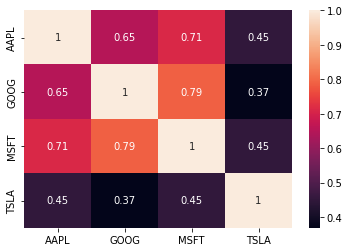

In [ ]:
sns.heatmap(returns.corr(), xticklabels=returns.columns, yticklabels=returns.columns, annot=True)

# Portfolio Optimisation

Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level. Every asset in a portfolio has its own rate expected returns and risks. It is possible to create multiple combinations of assets that can provide high returns for a pre-defined risk level.

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

In [12]:
returns # Extract data from Yfinance, and apply log returns function
for col in returns.columns:
    # print(returns[col].var())
    # And to examine standard deviation in a year (i.e. volatility)
    print(np.sqrt(returns[col].var() * 250))

0.24026529263558052
0.2490037719898426
0.23437135668822606
0.5335591917549186


A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

In [13]:
old_col = returns.columns[-1]
for col in returns.columns:
    print(returns[col].cov(returns[old_col]))

0.0002317243629075618
0.0001959341290490979
0.0002259191966935653
0.0011387416444246484


In [14]:
cov_matrix = returns.cov()

In [15]:
cov_matrix

,AAPL,GOOG,MSFT,TSLA
AAPL,0.000231,0.000156,0.000161,0.000232
GOOG,0.000156,0.000248,0.000184,0.000196
MSFT,0.000161,0.000184,0.000220,0.000226
TSLA,0.000232,0.000196,0.000226,0.001139


In [18]:
corr_matrix = returns.corr()

In [19]:
corr_matrix

,AAPL,GOOG,MSFT,TSLA
AAPL,1.000000,0.651654,0.713498,0.451896
GOOG,0.651654,1.000000,0.787944,0.368690
MSFT,0.713498,0.787944,1.000000,0.451654
TSLA,0.451896,0.368690,0.451654,1.000000


Define weights for portfolio, problem of portfolio optimisation is to determine the weights

In [20]:
w = {'AAPL': 0.1, 'GOOG': 0.2, 'MSFT': 0.5, 'TSLA': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0002419328531559094

In [54]:
returns = df2_close.resample('Y').last().pct_change().mean()

In [56]:
vol = df2_close.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

In [57]:
assets = pd.concat([returns, vol], axis=1)

In [58]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_assets = len(df2_close.columns)
num_portfolios = 10000

In [59]:
# We simulate different weightings to generate portfolio returns and volatility
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    ret = np.dot(weights, returns) # Returns are the product of individual expected returns of asset and weight

    p_ret.append(ret)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    stan_dev = np.sqrt(var) # Daily standard deviation
    volatility = stan_dev*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(volatility)

In [60]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [61]:
for counter, symbol in enumerate(df2_close.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [62]:
portfolios = pd.DataFrame(data)

In [63]:
portfolios

,Returns,Volatility,AAPL weight,GOOG weight,MSFT weight,TSLA weight
0,-0.015744,0.241038,0.227127,0.293040,0.290447,0.189386
1,-0.018135,0.228972,0.320405,0.249618,0.305142,0.124836
2,-0.008701,0.244374,0.263650,0.353328,0.178397,0.204625
3,-0.004427,0.269720,0.335107,0.146012,0.214350,0.304530
4,-0.013063,0.231032,0.340188,0.299977,0.223169,0.136667
...,...,...,...,...,...,...
9995,-0.017123,0.251283,0.279055,0.112368,0.376172,0.232404
9996,0.002999,0.269843,0.307647,0.325450,0.060773,0.306130
9997,0.008768,0.290792,0.284721,0.330671,0.008066,0.376542
9998,0.000743,0.296176,0.040499,0.471813,0.098832,0.388856


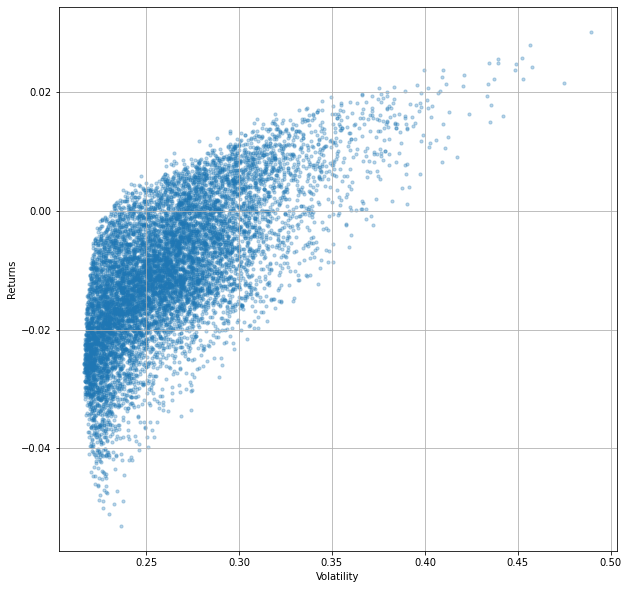

In [64]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [65]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]

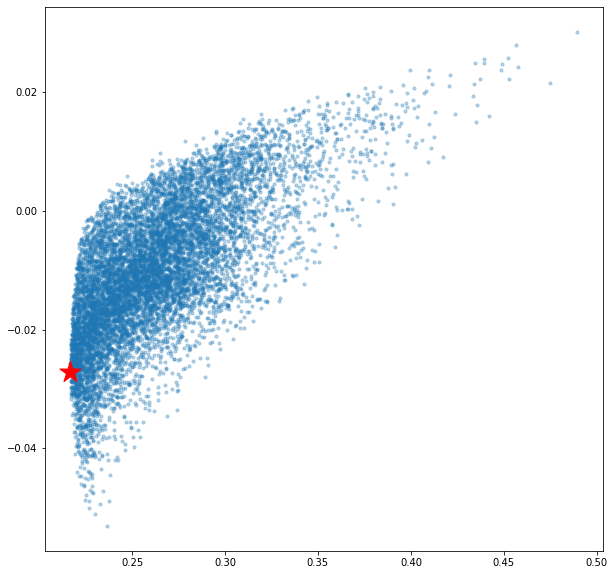

In [67]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. The optimal risky portfolio is the one with the highest Sharpe ratio.

In [68]:
risk_free_rate = 0.01
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-risk_free_rate)/portfolios['Volatility']).idxmax()]

In [69]:
optimal_risky_port

Returns        0.030088
Volatility     0.489531
AAPL weight    0.016372
GOOG weight    0.077628
MSFT weight    0.007598
TSLA weight    0.898402
Name: 8637, dtype: float64

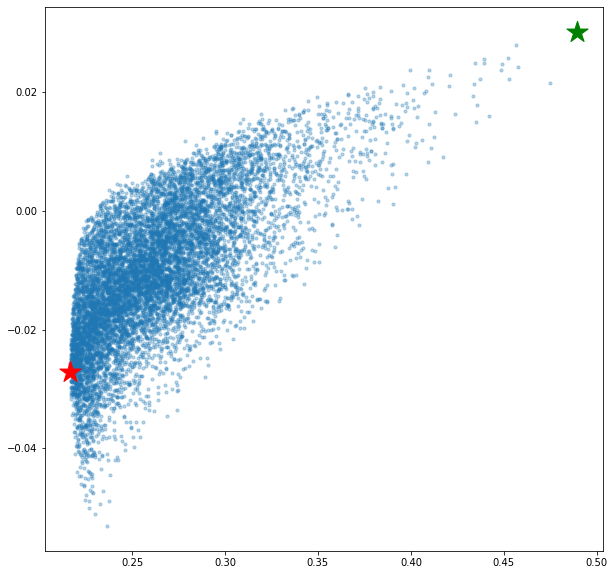

In [70]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)